In [2]:
%matplotlib notebook

import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [7]:
df = pd.DataFrame({'Name': pd.Series([], dtype='str'),
                   'ID' : pd.Series([], dtype='str'),
                   'Ratings': pd.Series([], dtype='int'),})
rating_re = r'.*?Rated by (\d*) people.*?'
title_re = r'Rate (.*?) by.*'
base_url = r'https://itch.io/jam/gmtk-2020/rate/'

In [8]:
ratings_page = requests.get("https://itch.io/jam/gmtk-2020/entries")
rating_soup = BeautifulSoup(ratings_page.content, 'html.parser')


In [17]:
i = 0
for game in rating_soup.findAll("div", {"class": "game_cell"}):
    if i > 300:
        break    
    i += 1
     
    game_id = game.attrs['data-game_id']
    
    if (df["ID"] == game_id).any():
        i -= 1
        continue
    
    print(game_id)
    page = requests.get("https://itch.io/jam/gmtk-2020/rate/" + game_id)
    soup = BeautifulSoup(page.content, 'html.parser')
    rating_div = soup.find("div", {"class": "num_ratings"})
    title_element = soup.find("title")
    ratings = int(re.search(rating_re, str(rating_div)).group(1))
    title = re.search(title_re, str(title_element)).group(1)
    df = df.append({"Name":title, "ID":game_id, "Ratings":ratings}, ignore_index=True)
    time.sleep(0.01)

697604
688733
700026
700793
699601
696136
693954
698984
699253
697742
696482
694446
699959
699615
699557
698059
699808
695218
696064
700524
695895
696327
698748
699665
697223
699100
697822
698631
699898
695742
696885
693310
695916
697233
696461
695594
695400
696695
699001
698923
699515
694273
697274
697952
698873
672866
697151
699126
696261
694068
700856
693284
694209
695330
698062
693984
698271
697821
697202
693366
696776
699119
700204
699319
696443
698934
696393
697747
697256
695185
694255
697705
696653
693772
695537
695315
698580
700265
699486
699101
698486
697490
693675
697049
698717
693387
694557
700466
696966
698509
695049
699944
697716
699651
698074
698706
696175
696095
697012
693530
700319
698549
698918
700664
698716
699914
693602
696507
699162
695899
698393
693182
697946
696791
697531
700371
699084
698339
697916
694825
694399
698845
696208
694915
697565
700860
695964
697534
695471
699596
700019
694691
694015
700146
697322
695051
699452
698061
697881
694332
695819
697205
696412

In [16]:
df

,Name,ID,Ratings
0,The Attack Of Furniture,697698,4
1,Submarine-Out of Control,698670,15
2,Safe Passage,697616,23
3,Balance It,698023,16
4,Run Away Flame,696567,15
5,Discount Tower,695056,9
6,Broken Controller,693735,21
7,Losing Control,699485,6
8,Stop at the Shop,693869,9
9,Buss go boom,698817,4


<IPython.core.display.Javascript object>


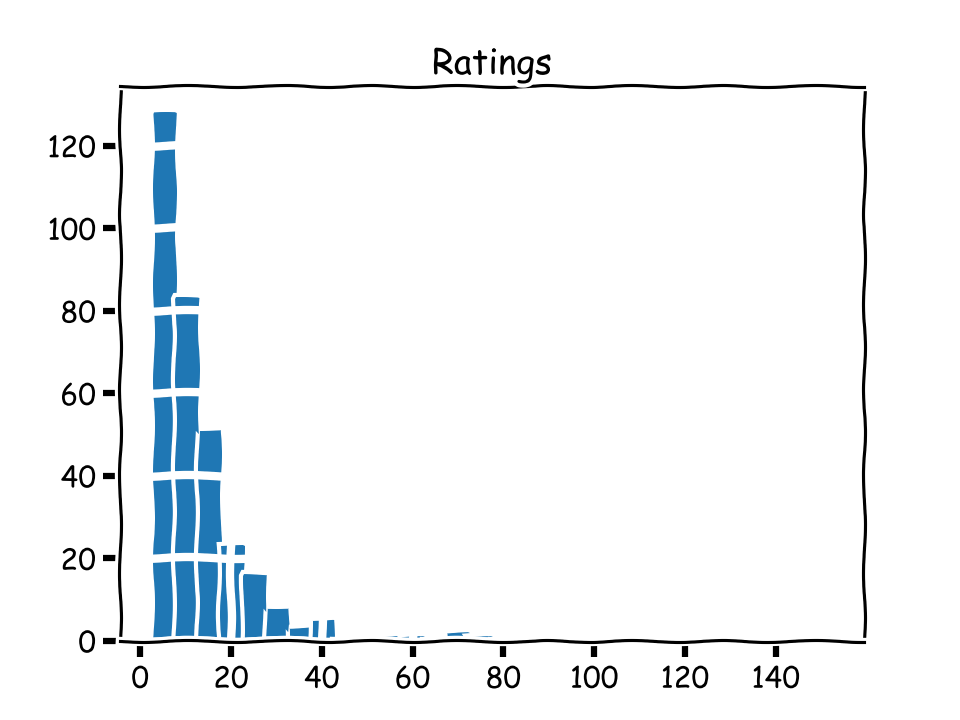

In [21]:
with plt.xkcd():
    hist = df.hist("Ratings", bins=30)

In [27]:
our_ratings = 39
np.sum(df['Ratings'] <= our_ratings) / len(df)

0.9752321981424149

In [26]:
len(df)

323